In [941]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [943]:
df=pd.read_csv("car data.csv")

In [944]:
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
162,Bajaj Pulsar NS 200,2012,0.45,0.99,14500,Petrol,Individual,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
195,Bajaj ct 100,2015,0.18,0.32,35000,Petrol,Individual,Manual,0
288,city,2015,8.40,13.60,34000,Petrol,Dealer,Manual,0
14,dzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0
168,Honda CB Trigger,2013,0.42,0.73,12000,Petrol,Individual,Manual,0
56,etios cross,2015,4.50,7.27,40534,Petrol,Dealer,Manual,0
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
152,Bajaj Pulsar NS 200,2012,0.50,0.99,13000,Petrol,Individual,Manual,0
74,etios cross,2014,4.90,8.93,83000,Diesel,Dealer,Manual,0


In [945]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [946]:
df.shape

(301, 9)

In [947]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [948]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [949]:
df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [950]:
df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [951]:
from sklearn.preprocessing import OrdinalEncoder

In [952]:
#df.replace({'Fuel_Type' :{'Petrol':0,'Diesel':1 , 'CNG':2}} , inplace=True)

In [953]:
#df.replace({'Seller_Type' :{'Dealer':0,'Individual':1 }} , inplace=True)

In [954]:
#df.replace({'Transmission' :{'Manual':0,'Automatic':1 }} , inplace=True)

In [955]:
oe=OrdinalEncoder(categories=[['Petrol','Diesel','CNG'],
                              ['Dealer','Individual'],
                              ['Manual','Automatic']])
                              

In [956]:
df[['Fuel_Type','Seller_Type','Transmission']]=oe.fit_transform(df[['Fuel_Type','Seller_Type','Transmission']]).astype(int)

In [957]:
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
71,corolla altis,2011,4.50,12.48,45000,1,0,0,0
193,Hero Ignitor Disc,2013,0.20,0.65,24000,0,1,0,1
117,Royal Enfield Thunder 500,2015,1.10,1.90,14000,0,1,0,0
149,Bajaj Pulsar 220 F,2016,0.51,0.94,24000,0,1,0,0
186,TVS Wego,2010,0.25,0.52,22000,0,1,1,0
272,city,2015,7.50,10.00,27600,0,0,0,0
89,etios g,2014,4.75,6.76,40000,0,0,0,0
164,Hero Splender iSmart,2016,0.45,0.54,14000,0,1,0,0
77,corolla,2004,1.50,12.35,135154,0,0,1,0
198,Bajaj Discover 125,2011,0.15,0.57,35000,0,1,0,1


In [958]:
X=df.drop(['Car_Name' ,'Selling_Price'], axis=1)
y=df['Selling_Price']

In [959]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [960]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [961]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,random_state=200 ,test_size=0.2)



In [962]:
lr_model=LinearRegression()

In [963]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [964]:
train_data =lr_model.predict(X_train)

In [965]:
metrics.r2_score(y_train ,train_data)

0.8809522074741793

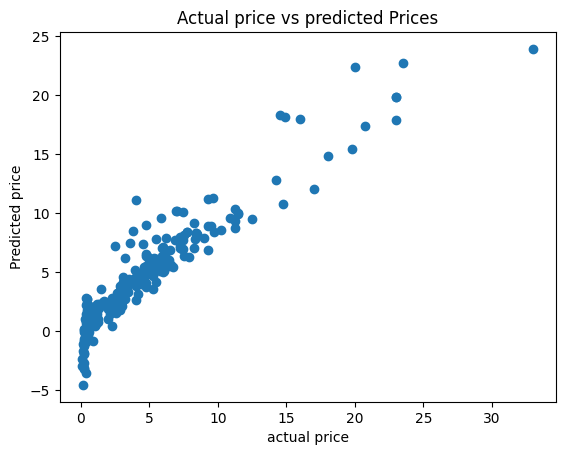

In [966]:
plt.scatter(y_train,train_data)

plt.xlabel("actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted Prices")
plt.show()

In [967]:
test_data =lr_model.predict(X_test)

In [968]:
metrics.r2_score(y_test ,test_data)

0.7854502771325589

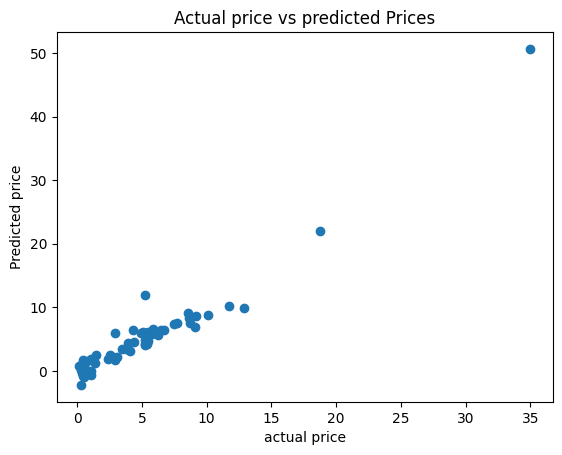

In [969]:
plt.scatter(y_test,test_data)

plt.xlabel("actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs predicted Prices")
plt.show()